In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow

In [5]:
import sklearn as sk

Epoch 1/50
8/8 [==============================] - 3s 71ms/step - loss: 0.7369 - accuracy: 0.6917 - val_loss: 0.4740 - val_accuracy: 0.9000
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4948 - accuracy: 0.7917 - val_loss: 0.3547 - val_accuracy: 0.9000
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.4076 - accuracy: 0.8083 - val_loss: 0.2963 - val_accuracy: 0.9000
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.3681 - accuracy: 0.8417 - val_loss: 0.2654 - val_accuracy: 0.9000
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.3324 - accuracy: 0.8583 - val_loss: 0.2411 - val_accuracy: 0.9333
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3060 - accuracy: 0.8833 - val_loss: 0.2232 - val_accuracy: 0.9667
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.2786 - accuracy: 0.9083 - val_loss: 0.2073 - val_accuracy: 0.9667
Epoch 8/50
8/8 [===========

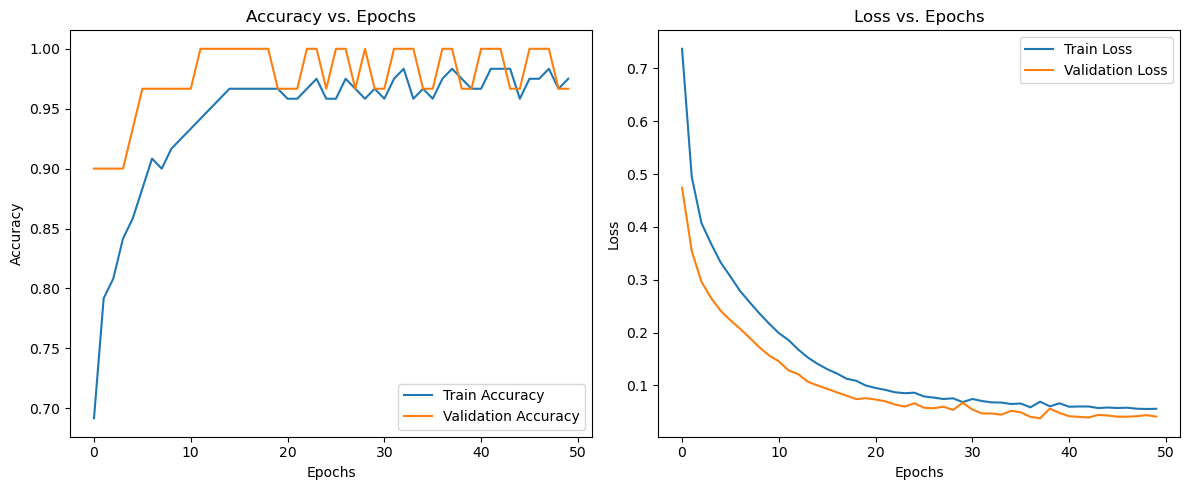

Custom Layer 1 - k0: 0.19485363364219666, k1: 1.1520096063613892
Custom Layer 2 - k0: 0.044133882969617844, k1: 1.2133077383041382


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Define the custom activation function
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomActivation, self).__init__()
        self.k0 = tf.Variable(initial_value=0.1, trainable=True, dtype=tf.float32)
        self.k1 = tf.Variable(initial_value=1.0, trainable=True, dtype=tf.float32)

    def call(self, inputs):
        return self.k0 + self.k1 * inputs

# Load and preprocess the Iris dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode the target
ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1, 1)).toarray()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
def build_model(input_dim, output_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64)(inputs)
    x = CustomActivation()(x)
    x = Dense(32)(x)
    x = CustomActivation()(x)
    outputs = Dense(output_dim, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Compile the model
model = build_model(X_train.shape[1], y_train.shape[1])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=16, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Display learned parameters
custom_layers = [layer for layer in model.layers if isinstance(layer, CustomActivation)]
for i, layer in enumerate(custom_layers):
    print(f"Custom Layer {i+1} - k0: {layer.k0.numpy()}, k1: {layer.k1.numpy()}")
